## Quiz 2 - Probability, Statistics (ლექცია 4, ლექცია 5) - 7 ქულა

იხილეთ LoanStatus.csv მონაცემთა ფაილი, რომელშიც მოცემულია კლიენტთა ინფორმაცია შემდეგი სვეტებით:

Loan ID - კლიენტის ID

Gender - სქესი

Married - დაქორზინებული არის თუ არა

Dependents - ოჯახის წევრების რაოდენობა, რომლის ფინანსურ მხარდაჭერასაც უზრუნველყოფს კლიენტი

Education - არის თუ არა უმაღლესი განათლების მქონე

Self_Employed - არის თუ არა თვითდასაქმებული

ApplicantIncome - კლიენტის შემოსავალი (per month)

LoanAmount  - სესხის რაოდენობა (ათასებში)

Loan_Amount_Term - სესხის ვადა

Credit_History - როგორი საკრედიტო ისტორია აქვს კლიენტს (1-კარგი, 0-ცუდი)

Property_Area - საცხოვრებელი და სამუშაო ადგილი

Loan_Status - სესხის გაცემის სტატუსი


## დავალება 1: აღწერილობითი სტატისტიკა  (1 ქულა)
ა) გახსენით ფაილი და დაბეჭდეთ აღწერილობითი სტატისტიკის მონაცემები თქვენთვის საინტერესო ველებისთვის, როგორიცაა საშუალო, მედიანა, მოდა, სტდ. გადახრა, ა.შ. (მოახდინეთ სიტყვიერი ინტერპრეტაცია);

ბ) დაითვალეთ თითოეულ სვეტში ცარიელი მნიშვნელობების რაოდენობა შესაბამისი ფუნქციით

In [2]:
import pandas as pd
import warnings

from scipy.stats import norm
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("LoanStatus.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,187.0,360.0,1.0,Urban,Y


In [4]:
#გაცემული სესხის მაქსიმალური და მინიმალური მნივნელობა
max = df['LoanAmount'].max()
min = df['LoanAmount'].min()
print('max = ', max)
print('min = ', min)

#გაცეული სესხის მოდა
mode = df['LoanAmount'].mode()
print('mode = ', int(mode))

#გაცემული სესხის მედიანა
median = df['LoanAmount'].median()
print('median = ', median)

#გაცემული სესხის საშუალო
mean = df['LoanAmount'].mean()
print('mean = ', mean)

#გაემული სისხების სტანდატრული გადახრა
std = df['LoanAmount'].std()
print('std = ', std)

max =  700.0
min =  9.0
mode =  120
median =  128.0
mean =  146.41216216216216
std =  85.58732523570545


In [5]:
#ცარიელი მნიშვნელობების რაოდენობა თითოეულ სვეტში
df.isnull().sum()

Loan_ID              0
Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
ApplicantIncome      0
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
dtype: int64

## დავალება 2:  ალბათობა (1 ქულა)
ა) დაითვალეთ, რა არის სესხის აღების ალბათობა Loan_Status-ის მიხედვით.

ბ) რა არის სესხის აღების ალბათობა, მაშინ როცა კლიენტს კარგი საკრედიტო ისტორია აქვს.

კოდს დაურთეთ თქვენი კომენტარები მოკლედ

In [6]:
#სესხის აღების ალბათობა (გაცემული სესხის რაოდენობა შეფარდებული მთლიან რაოდენობაზე)
gave_loan = df[df["Loan_Status"] == "Y"]["Loan_Status"].count()
total_loan = df["Loan_Status"].count()

probability = gave_loan/total_loan
probability

0.6872964169381107

In [7]:
#სესხის აღების ალბათობა, მაშინ როცა კლიენტს კარგი საკრედიტო ისტორია აქვს (კეთდება ფილტრი რომ დავითვალოთ კარგი ისტორია და გაცემული სესხი ერთად და შემდეგ ვაფარდებთ გაცემული სესხის მთლიან რაოდენობასთან)
loan_filter = (df["Loan_Status"] == "Y") & (df["Credit_History"] == 1.0)
gave_loan = df[loan_filter]["Loan_Status"].count()
total_loan = df[df["Loan_Status"] == "Y"]["Loan_Status"].count()

conditional_probability = gave_loan/total_loan
conditional_probability

0.8957345971563981

## დავალება 3: გრაფიკული წარმოდგენა (1 ქულა)
ა) seaborn.distplot ან seaborn.histplot() ფუნქციის გამოყენებით, ააგეთ რომელიმე სვეტისთვის შესაბამისი გრაფიკი. ლინკი: https://seaborn.pydata.org/generated/seaborn.distplot.html

ბ) matplotlib.pyplot.hist ფუნქციის გამოყენებით, ააგეთ რომელიმე სვეტისთვის შესაბამისი ჰისტოგრამი, რომელშიც bin-ების (ჰოსტოგრამაში ბლოკების) რაოდენობას თქვენ განსაზღვრავთ (მაგ. ჰისტოგრამაში 10 სვეტად წარმოადგინოთ მონაცემები.) იხ. დოკუმენტაცია შემდეგ ლინკზე: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

Future warnings-ების გამოსართავად ჩაწერეთ შემდეგი ბრძანებები:
import warnings
warnings.filterwarnings("ignore")

კოდს დაურთეთ თქვენი კომენტარები მოკლედ

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Distribution of Variable Loan')

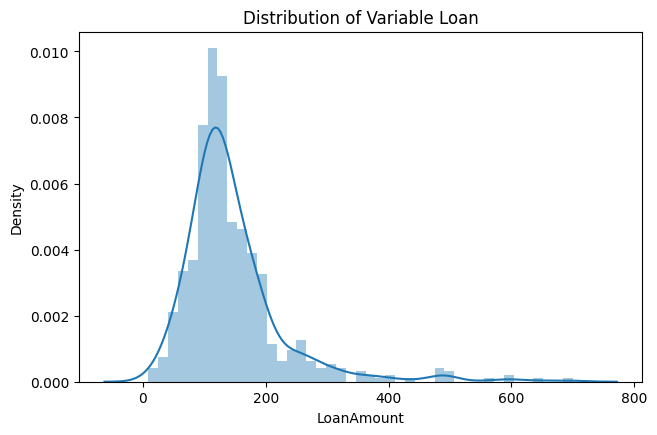

In [16]:
fig = plt.figure(figsize=(16, 10))

plt.subplot(221)
ax1 = sns.distplot(df["LoanAmount"])
plt.title(f"Distribution of Variable Loan")

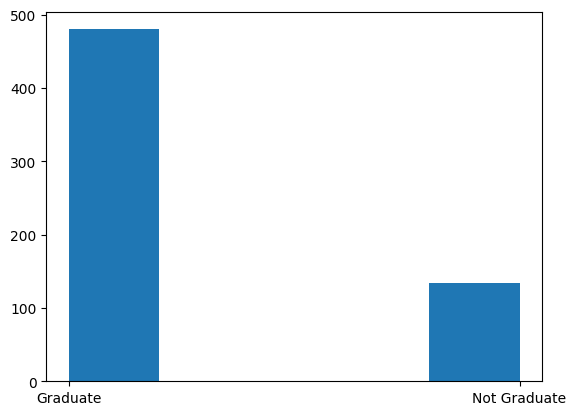

In [21]:
plt.hist(df['Education'].dropna(), bins=5)
plt.show()

## დავალება 4:  კუმულაციური ალბათობა (Cumulative distribution function) - (1 ქულა)
დაითვალეთ შემდეგი კუმულაციური ალბათობა scipy.stats.norm.cdf() ფუნქციის გამოყენებით.
დაითვალეთ კლიენტების რამდენ პროცენტს აქვს შემოსავალი 2000 ევროზე ნაკლები ყოველთვიურად.
norm.cdf(x, mean_val, std_dev_val) ფუნქციის პირველი პარამეტრია სასაზღვრო მნიშვნელობა, მეორე- საშუალო, მესამე -სტდ. გადახრა.

#### მოახდინეთ შედეგების სიტყვიერი ინტერპრეტაცია

In [22]:
from scipy.stats import norm

In [23]:
ApplicantIncome_mean = df['LoanAmount'].mean()
ApplicantIncome_std = df['LoanAmount'].std()
less = norm.cdf(2000, ApplicantIncome_mean, ApplicantIncome_std)
print("Cumulative probability: ", less)

Cumulative probability:  1.0


## დავალება 5: სტატისტიკა (1 ქულა)

ააგეთ 2 boxplot დიაგრამა seaborn.boxplot() ფუნქციის გამოყენებით რომელიმე ველის მიმართ.

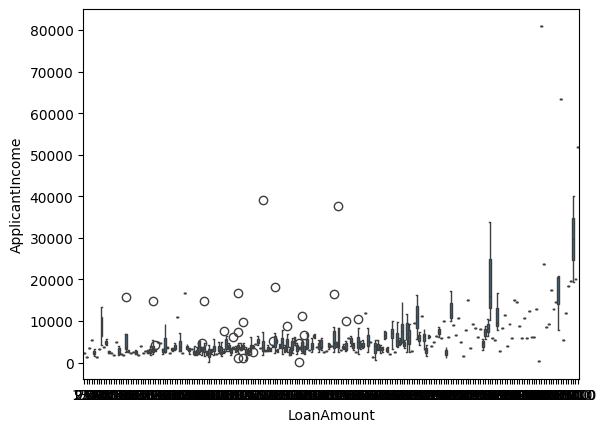

In [24]:
sns.boxplot(x='LoanAmount', y='ApplicantIncome', data=df)
plt.show()

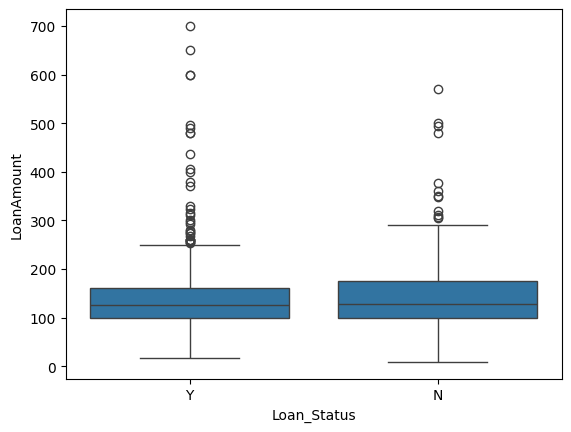

In [28]:
sns.boxplot(x='Loan_Status', y='LoanAmount', data=df)
plt.show()

## დავალება 6: t-test (2 ქულა)
ა) გააკეთეთ t-test ანალიზი (One sample t-test)  რომელიმე სვეტის მიმართ და გამოიყენეთ  ttest_1samp ფუნქცია.

ბ) გააკეთეთ t-test ანალიზი (Two sample t-test) რომელიმე სვეტის მიმართ და გამოიყენეთ  ttest_ind ფუნქცია.

განსაზღვრეთ ნულოვანი და ალტერნატიული ჰიპოთეზა, გამოიყენეთ აღნიშნული ფუნქციები და მოახდინეთ შედეგების სიტყვიერი ინტერპრეტაცია.

In [29]:
from scipy.stats import ttest_1samp,ttest_ind

In [34]:
from scipy.stats import ttest_1samp

t_statistic, p_value = ttest_1samp(df['ApplicantIncome'], df['ApplicantIncome'].mean())
print("T-statistic:", t_statistic, "P-value: ", p_value)

T-statistic: 0.0 P-value:  1.0


In [38]:
from scipy.stats import ttest_ind

loan_urban = df[df['Loan_Status'] == 'Y']['Loan_Amount_Term']
loan_rural = df[df['Loan_Status'] == 'N']['Loan_Amount_Term']
t_statistic, p_value = ttest_ind(loan_urban, loan_rural)
print("T-statistic: ", t_statistic, "P-value: ", p_value)

T-statistic:  nan P-value:  nan
